In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Завантаження даних з файлу
data = np.loadtxt('data.txt', delimiter='\t', dtype=int)
# Перевірка завантажених даних
print("Дані розмірність:\n", data.shape)
# Колонка для Ore
#ore_test = data[:, 0]  
#print(f"Перший елемент {ore_test}")

Дані розмірність:
 (122, 3)


In [3]:
price_ectoplasm = 38  # Ціна Ектоплазми
price_ore = 0.6
price_wood = 0.55
price_t6 = 0.95
price = np.array([price_ectoplasm, price_ore, price_wood])

In [4]:
r = (data * price).sum(axis=1)/250
print(f"Вартість одного Ітема при експерименті розщеплення {r}")

Вартість одного Ітема при експерименті розщеплення [32.1998 36.3008 35.6282 35.051  37.2176 35.8116 34.1674 36.567  38.402
 34.8816 34.1216 35.0538 34.334  35.3288 32.8016 36.5868 36.5944 34.7838
 38.1068 34.9442 35.3666 32.7528 36.8728 34.6252 34.4986 35.8864 36.013
 37.7784 32.7708 33.9542 33.8046 35.3438 33.0368 34.8764 35.5074 36.2846
 36.1234 38.066  31.4584 32.4944 34.0196 35.2102 32.0066 37.4832 37.6626
 32.3172 34.0068 31.7162 29.748  37.9476 35.2042 33.8604 34.005  35.981
 30.1004 35.3796 37.0474 34.7696 35.6938 36.2622 33.7052 26.0902 35.8154
 35.4622 35.6712 31.4332 37.2206 31.3856 36.5576 34.151  34.746  35.945
 33.1174 34.3026 35.823  34.6212 34.733  28.8426 31.8534 35.3712 30.0546
 34.4196 32.7682 35.7968 36.1008 34.1542 32.1362 37.5128 34.4098 34.7392
 38.115  33.6866 31.3154 33.991  32.1214 33.5164 34.748  36.1122 34.3124
 35.8228 31.8198 37.3782 35.5268 33.2742 37.1836 37.1808 35.6542 35.8458
 34.9082 35.0778 31.8538 35.5356 37.1634 35.6868 35.096  36.5958 37.5152
 32.

In [5]:
# Задаємо ціни базових предметів
prices_base = np.array([price_t6, price_ore, price_wood])  # Ціни: [T6, руда, дерево]

cost_disassembly = 0.05  # Вартість розщеплення

# Кількість базових предметів, необхідних для створення одного предмета
resources_required = np.array([15, 11, 10])

price_of_crafting = sum(prices_base * resources_required)

print(f"Вартість одного предмету {price_of_crafting}")

Вартість одного предмету 26.35


In [6]:
# Знаходимо мін та макс для гістограми
# Робимо крок гістограми 0.5
bins = np.arange(np.floor(r.min()), np.ceil(r.max() + 1), 0.5)
bins[0:]

array([26. , 26.5, 27. , 27.5, 28. , 28.5, 29. , 29.5, 30. , 30.5, 31. ,
       31.5, 32. , 32.5, 33. , 33.5, 34. , 34.5, 35. , 35.5, 36. , 36.5,
       37. , 37.5, 38. , 38.5, 39. , 39.5])

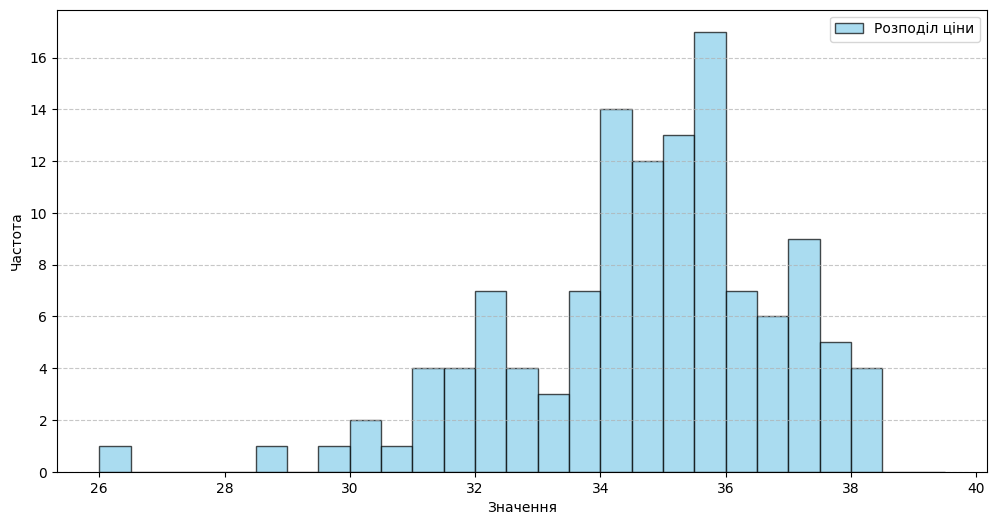

In [7]:
plt.figure(figsize=(12, 6))

plt.hist(r, bins=bins, color='skyblue', edgecolor='black', alpha=0.7, label="Розподіл ціни")

plt.xlabel('Значення')
plt.ylabel('Частота')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

[26.0902 28.8426 29.748  30.0546 30.1004 30.5246 31.3154 31.3856 31.4332
 31.4584 31.7162 31.8198 31.8534 31.8538 32.0066 32.035  32.1214 32.1362
 32.1998 32.3172 32.4944 32.7528 32.7682 32.7708 32.8016 33.0368 33.1174
 33.2742 33.5164 33.6866 33.7052 33.8046 33.8604 33.9542 33.991  34.005
 34.0068 34.0196 34.1216 34.151  34.1542 34.1674 34.3026 34.3124 34.334
 34.4098 34.4196 34.4584 34.4986 34.6212 34.6252 34.733  34.7392 34.746
 34.748  34.7696 34.7838 34.8764 34.8816 34.9082 34.9442 35.051  35.0538
 35.0778 35.096  35.2042 35.2102 35.3288 35.3438 35.3594 35.3666 35.3712
 35.3796 35.4622 35.5074 35.5268 35.5356 35.6282 35.6542 35.6712 35.6868
 35.6938 35.7968 35.8116 35.8154 35.8228 35.823  35.8458 35.8864 35.945
 35.981  36.013  36.1008 36.1122 36.1234 36.2622 36.2846 36.3008 36.5576
 36.567  36.5868 36.5944 36.5958 36.8728 37.0474 37.1634 37.1808 37.1836
 37.2176 37.2206 37.3576 37.3782 37.4832 37.5128 37.5152 37.6626 37.7784
 37.9476 38.066  38.1068 38.115  38.402 ]


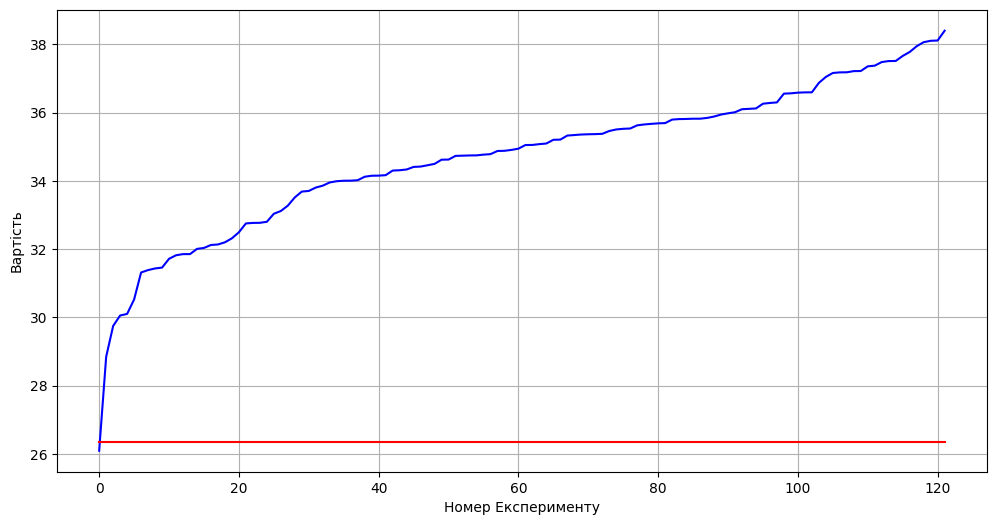

In [8]:
r_sorted = np.array(sorted(r))
print(r_sorted)

plt.figure(figsize=(12, 6))


plt.plot(r_sorted, color='blue')
plt.plot(np.repeat(price_of_crafting, 122), color='red')
plt.ylabel("Вартість")
plt.xlabel("Номер Експерименту")
plt.grid()
plt.show()

In [9]:
profit_crafting = r_sorted - price_of_crafting
print(f"Прибуток як різниця між вартість та отриманим результатом {profit_crafting.sum()/122}")

Прибуток як різниця між вартість та отриманим результатом 8.342877049180327


Середня кількість Ектоплами: 221.57
Середня кількість руди: 222.64
Середня кількість дерева: 217.88
Собівартість створення одного предмета: 26.40 монет
Середній прибуток: 8646.82 монет на одну операцію


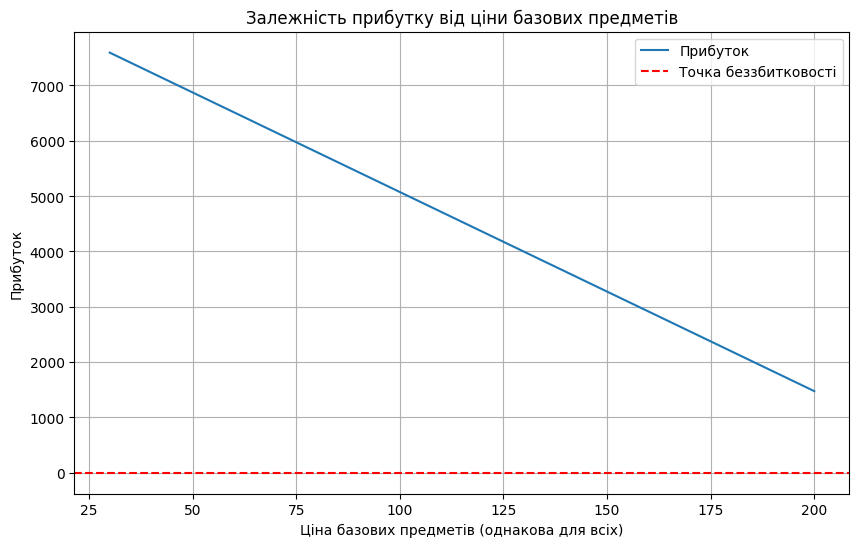

In [10]:
# Завантаження даних про результати розщеплення
ectoplasm, ore, wood = data[:, 0], data[:, 1], data[:, 2]

# Розрахунок середньої кількості отриманих предметів
avg_ectoplasm = np.mean(ectoplasm)
avg_ore = np.mean(ore)
avg_wood = np.mean(wood)

# Розрахунок середньої виручки
avg_revenue = avg_ectoplasm * price_ectoplasm + avg_ore * prices_base[1] + avg_wood * prices_base[2]

# Розрахунок собівартості
cost_per_item = np.sum(resources_required * prices_base) + cost_disassembly

# Розрахунок прибутку
profit = avg_revenue - cost_per_item

# Виведення результатів
print(f"Середня кількість Ектоплами: {avg_ectoplasm:.2f}")
print(f"Середня кількість руди: {avg_ore:.2f}")
print(f"Середня кількість дерева: {avg_wood:.2f}")
print(f"Собівартість створення одного предмета: {cost_per_item:.2f} монет")
print(f"Середній прибуток: {profit:.2f} монет на одну операцію")

# Візуалізація залежності прибутку від ціни базових предметів
prices_variation = np.linspace(30, 200, 150)  # Варіюємо ціну базових предметів
profits = []

for price in prices_variation:
    temp_prices = np.array([price, price, price])
    temp_cost = np.sum(resources_required * temp_prices) + cost_disassembly
    temp_profit = avg_revenue - temp_cost
    profits.append(temp_profit)

plt.figure(figsize=(10, 6))
plt.plot(prices_variation, profits, label="Прибуток")
plt.axhline(0, color='red', linestyle='--', label="Точка беззбитковості")
plt.xlabel("Ціна базових предметів (однакова для всіх)")
plt.ylabel("Прибуток")
plt.title("Залежність прибутку від ціни базових предметів")
plt.legend()
plt.grid()
plt.show()